<a href="https://colab.research.google.com/github/viviantram03/labb-1/blob/main/Lab2.2-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#EE15D'>**SVM**</font>

<font color='#EE15D'>**Questions:**</font>

1.   LinearSVC section: Create 2 models (model1, model2), compare the results after visulizations, Which one is a better classifier for this dataset?
2.   SVC section: Create one model (model3), with SVC and compare it with 2 previous models after visulizations .
1.   Use model3.support_ and model3.n_support_ to determine the number of support vectors in each class in model 3. Visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?
2.   NuSVC section, Create one model (model4) with NuSVC, and compare it with 3 previous models after visulizations.
1.   Visualize model 4 and compare the number of support vector machines with model 3.
2.   Kernel Trick section: Create 3 models (model5, model6, and model7), Visualize the results of the 3 models and interpret them. Which model best fits the data?

<font color='#EE15D'>Note:</font> Proceed through the code, answering the questions one by one in separate cells, each inserted after its corresponding question.






## **🔸 Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font color='#EE15D'>Note:</font>  Before starting, if you are not familiar with scikit-learn or how to import, please study this link.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



## **🔸 SVM (sklearn)**

In [4]:
from sklearn.svm import LinearSVC, SVC, NuSVC

<font color='#EE15D'>We have created a dataset with 1000 samples and 2 classes

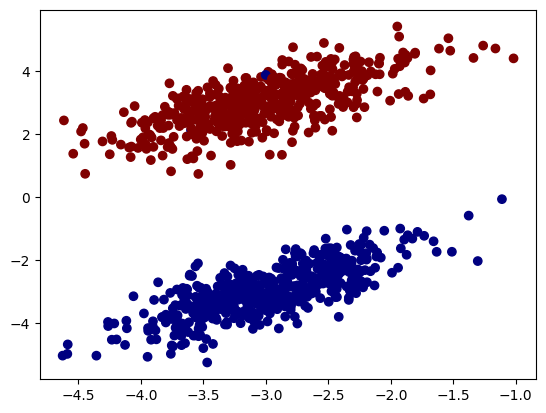

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>Create 2 models based on the following hyperparameters and compare the results after visulizations:



*   **model1**: LinearSVC, loss= hinge, C=1.2, max_iter=2000
*   **model2**: LinearSVC, loss= squared_hinge, C=2.5, max_iter=1000

<font color='#EE15D'>Which one is a better classifier for this dataset?

The two models with LinearSVC both perform well because the dataset is linearly seperable. Model 1 uses loss='hinge' and a slightly lower regularization parameter (C=1.2), while model 2 uses loss='squared_hinge' and a higher C=2.5. The second model provides a smoother and more stable margin thanks to the squared hinge loss  and the higher C value, which means it fits the data slightly better. Model 2 is therefore a better classifier for this dataset because it creates a clearer decision boundary and has fewer missclassifications.






In [6]:
model1 = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model1.fit(X, y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000)

In [7]:
model2 = LinearSVC(loss='squared_hinge', C=2.5, max_iter=1000)
model2.fit(X, y)

LinearSVC(C=2.5)

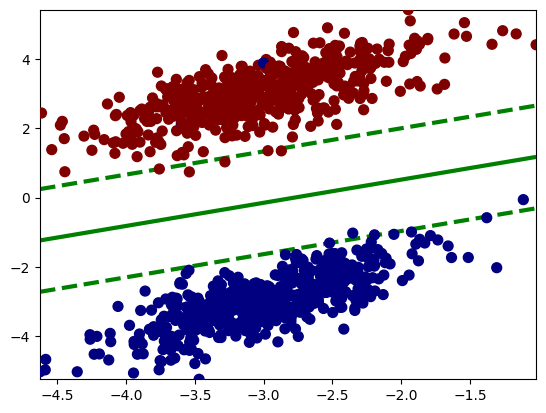

In [8]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model1.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### `SVC`

<font color='#GG15D'>**Question2:** </font> <font color='#EE15D'>Create one model (model3) with SVC based on the following info and compare it with 2 previous models after visulizations:


*   **model3**: SVC, C=1.0, kernel=linear, probability=True

When we use an SVC model with kernel='linear' and C=1.0, it computes the exact soft-margin solution using quadratic optimization. Since the dataset is linearly separable, the decision boundary is very similar to those produced by the LinearSVC models. However, SVC also identifies the actual support vectors and provides a slightly more precise margin. Model 3 therefore performs equally well or slightly better than the two previous LinearSVC models in terms of boundary accuracy and interpreatbility.



In [9]:
model3 = SVC(C=1.0, kernel='linear', probability=True)
model3.fit(X, y)

SVC(kernel='linear', probability=True)

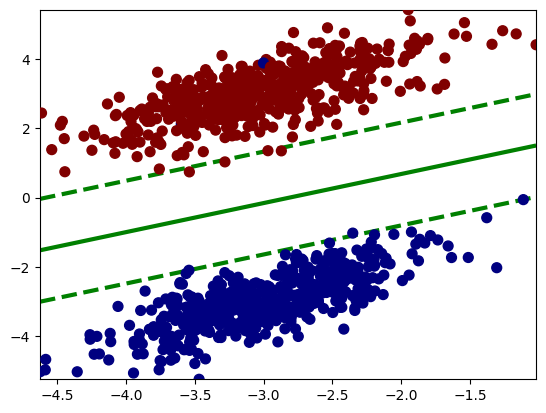

In [10]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


<font color='#GG15D'>**Question3**:</font> Use <font color='#EE15D'> model3.support_</font> and <font color='#EE15D'>model3.n_support_</font> to determine the number of support vectors in each class. Then, use the code below to visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?

From model3.support_ and model3.n_support_, we see that the model uses a total of 9 support vectors, 5 for class 1 and 4 for class 2. These support vectos lie exactly on the margins on either side of the decision boundary and determine its position. Since the dataset is clearly separable, only a few support vectors are needed, which shows that the model is well optimized and not overfitting.

In [11]:
print ("Indices of support vectors:", model3.support_)
print ("Number of support vectors per class:", model3.n_support_)

Indices of support vectors: [154 225 770 808 902 115 208 819 930]
Number of support vectors per class: [5 4]


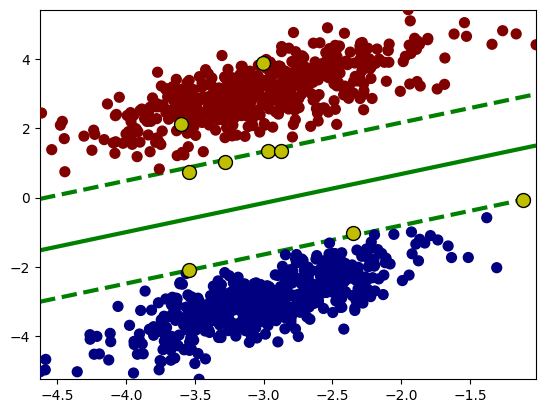

In [12]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model3.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='y', s=100, edgecolors='k')

### `NuSVC`

<font color='#GG15D'>**Question4**:</font> <font color='#EE15D'>Create one model (model4) with NuSVC based on the following hyperparameters and compare it with 3 previous models after visulizations:

The NuSVC model uses the parameter nu to control the fraction of training samples that become support vectors and the fraction of allowed misclassifications. In this case, the model forms a decision boundary very similar to the linear SVC's but relies on a larger number of support vectors. Model 4 therefore performs slightly similarly to model 3, but with a slightly higher model complexity due to the increased number of support vectors.

*   **model4**: NuSVC, nu=0.95, kernel=linear, probability=True


In [13]:
model4 = NuSVC(nu=0.05, kernel='linear', probability=True)
model4.fit(X, y)

NuSVC(kernel='linear', nu=0.05, probability=True)

<font color='#GG15D'>**Question5**:</font> <font color='#EE15D'>Visualize model 4 with the following code and compare the number of support vector machines with model 3.

When visualizing model 4 (NuSVC), we can see that its decision boundary almost overlaps with that of model 3. The main difference is that model 4 uses more support vectors, which indicates that it achieves similar accuracy but with a slightly more complex representation. NuSVC thus maintains good classification performance while offering a different balance between margin width and the number of support vectors.

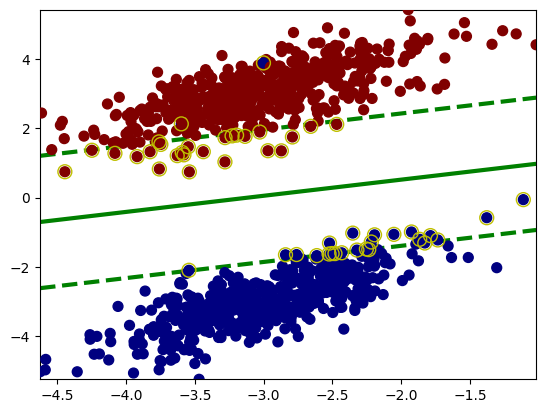

In [14]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model4.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

## **🔸 Kernel Trick (sklearn)**

<font color='#EE15D'>When the dataset is not linearly separable

In [15]:
from sklearn.svm import SVC

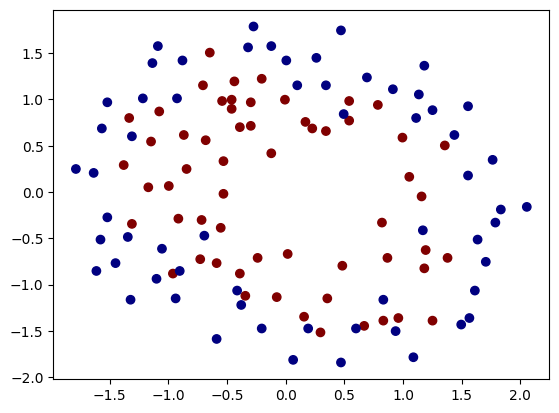

In [16]:
#Load the dataset
url = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/refs/heads/main/Lab2-Data/ex2data2.txt"
data = np.loadtxt(url, delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

<font color='#GG15D'>**Question6**: <font color='#EE15D'>Create 3 models (model5, model6, and model7) with the following hyperparameters:



*   **model5** : SVC, C=1.0, kernel=poly, degree=2, coef0=1
*   **model6** : SVC, C=1.0, kernel=rbf, degree=2, coef0=1
*   **model7** : SVC, C=1.0, kernel=sigmoid, degree=2, coef0=1

<font color='#EE15D'>Visualize the results of the 3 models and interpret them. Which model best fits the data?

The polynomial kernel (model 5) with degree 2 creates a curved boundary that captures some of the non-linear structure but doesn't perfectly separate the classes. The RBF kernel (model 6) adapts best, forming a smooth and flexible decision boundary that clearly divides the two classes. The sigmoid kernel produces a more diffuse and less accurate separation. Overall, the RBF kernel gives the best fit, as it effectively models the non-linear relationships between features and provides the most accurate classification.





In [17]:
model5 = SVC(C=1.0, kernel='poly', degree=2, coef0=1)
model5.fit(X, y)

SVC(coef0=1, degree=2, kernel='poly')

In [18]:
model6 = SVC(C=1.0, kernel='rbf', degree=2, coef0=1)
model6.fit(X, y)

SVC(coef0=1, degree=2)

In [19]:
model7 = SVC(C=1.0, kernel='sigmoid', degree=2, coef0=1)
model7.fit(X, y)

SVC(coef0=1, degree=2, kernel='sigmoid')

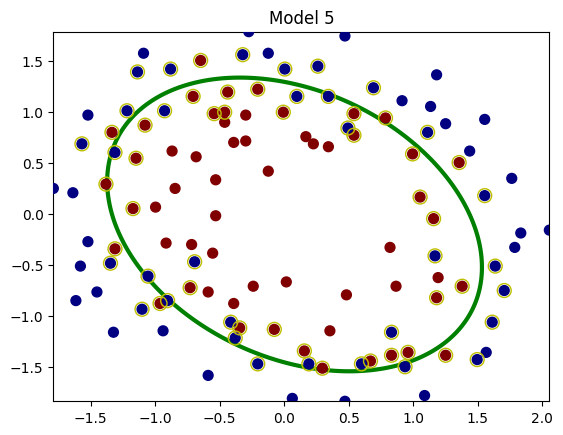

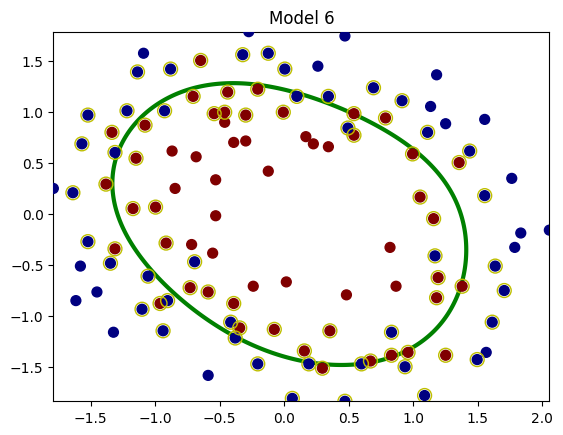

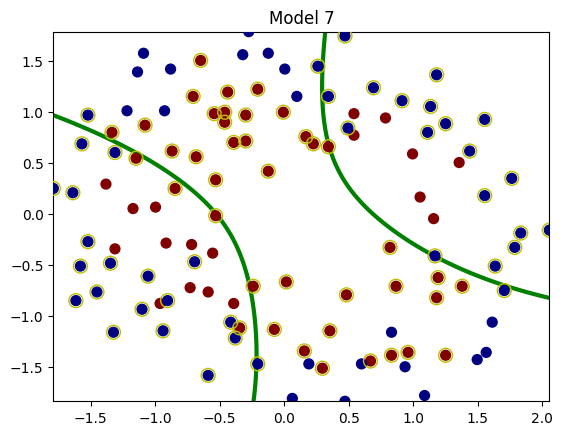

In [29]:
#model 5
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model5.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 5")
plt.show()

#model 6
ym = model6.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model6.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 6")
plt.show()

#model 7
ym = model7.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model7.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 7")
plt.show()

